In [25]:
%matplotlib inline

from IPython.html import widgets
from IPython.html.widgets import interact, IntSlider, FloatSlider

from IPython.display import display

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import cv2

import camera_calibration as cc
import window_search as ws
import data
import util

def f_slider(min, max, value):
    return FloatSlider(min=min, max=max, value=value)

def i_slider(min, max, value):
    return IntSlider(min=min, max=max, value=value)

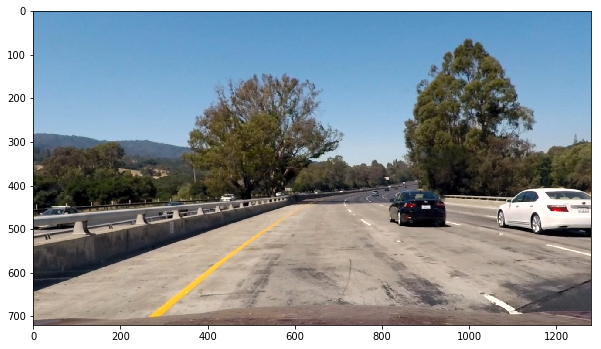

In [26]:
path = 'test_images/test1.jpg'

img_size = (1280, 720)

svc, X_scaler, params = data.load_model()

objpoints, imgpoints = cc.load_corners()
mtx, dist = cc.calibrate_camera(objpoints, imgpoints, img_size)

image = cv2.imread(path)
image = cv2.undistort(image, mtx, dist, None, mtx)
plt.figure(figsize=(10,10))
rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(rgb)

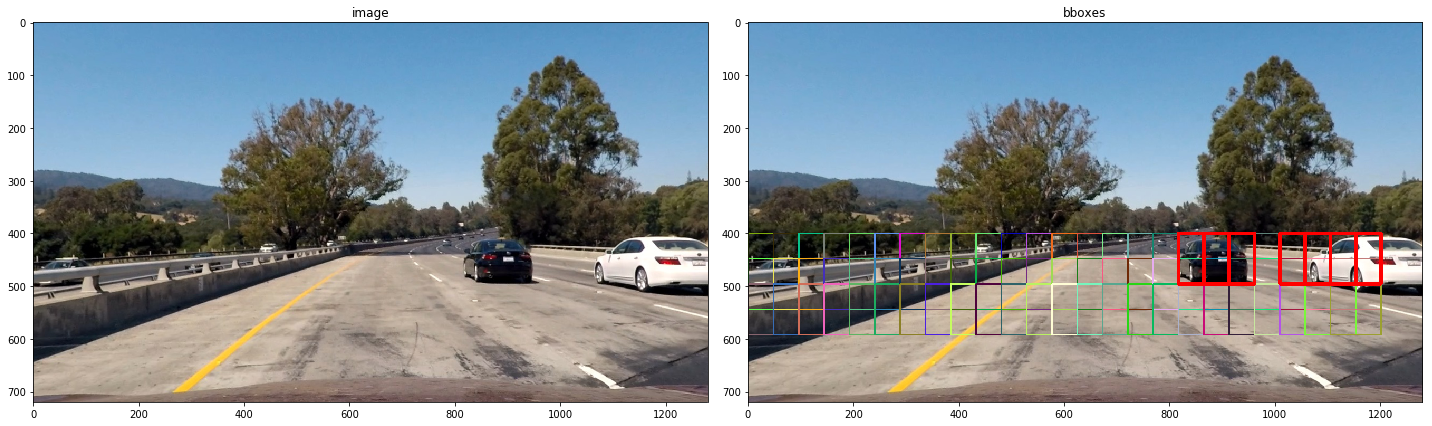

In [32]:
import random
def _rand256():
    return random.randrange(0, 256)

def interactive_window_search(ystart, ystop, scale):
    bboxes, target_bboxes = ws.find_car_bboxes(image, svc, X_scaler, params, debug=True, ystart=ystart, ystop=ystop, scale=scale)

    draw_img = np.copy(image)
    for bbox in target_bboxes:
        cv2.rectangle(draw_img, bbox[0], bbox[1], (_rand256(), _rand256(), _rand256()), 2)
    for bbox in bboxes:
        cv2.rectangle(draw_img, bbox[0], bbox[1], (0, 0, 255), 6)
 
    fig = plt.figure(figsize=(20,30))
    plt.subplot(121)
    plt.imshow(util.rgb(image))
    plt.title('image')
    plt.subplot(122)
    plt.imshow(util.rgb(draw_img))
    plt.title('bboxes')
    fig.tight_layout()
    
interact(interactive_window_search,\
         ystart=i_slider(300, 800, 400), ystop=i_slider(300, 800, 656),\
         scale=f_slider(0.0, 5.0, 1.0))
